In [1]:
import seaborn as sns      #importing libraries
import numpy as np      
import pandas as pd
import random
import sklearn as sk
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline
diamonds=sns.load_dataset('diamonds')

In [2]:
data=diamonds

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
from statistics import mean
a1=data['depth'].mean() #pandas function that finds the mean of depth column
a1

61.749404894327036

In [5]:
from scipy import stats
a2=data['depth'].mode() #pandas function that finds the mode of depth column
a2

0    62.0
Name: depth, dtype: float64

In [6]:
from statistics import median
a3=data['depth'].median() #pandas function that finds median of depth column
a3

61.8

In [7]:
from statistics import stdev
a4=data['depth'].std() #pandas function that finds standard deviation of depth column
a4

1.4326213188337733

In [8]:
from statistics import variance
a5=data['depth'].var() #pandas function that finds cariance of depth column
a5

2.05240384317702

In [9]:
from scipy.stats import skew
a6=data['depth'].skew() #pandas function that tells whether the graph of the depth data data is skewed negative or positive
a6

-0.08229402630189467

In [10]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
#from the above calculations, we can see that the data has many points and that it also has a negative skew, so a histogram would be an appropriate univariate distribution of depth measured by density.

C:\Users\augus\AppData\Local\Temp\ipykernel_2192\1977281183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(data['depth'], hist_kws=dict(), bins=10)
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


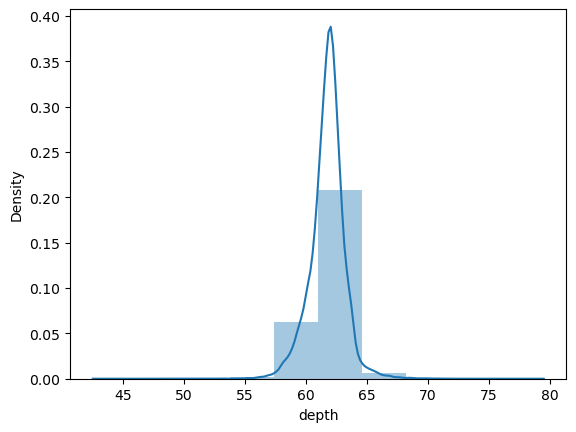

In [12]:
p=sns.distplot(data['depth'], hist_kws=dict(), bins=10)

In [13]:
#when looking at the data, I form a hypothesis that price and carat have a direct correlation
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
#I will use multivariate analysis to investigate this. 

In [15]:
np.cov(data['price'], data['carat']) #displays covariance between my two chosen variables

array([[1.59156294e+07, 1.74276536e+03],
       [1.74276536e+03, 2.24686660e-01]])

In [16]:
np.corrcoef(data['price'], data['carat']) #displays the correlation coefficient between my two chosen variables

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


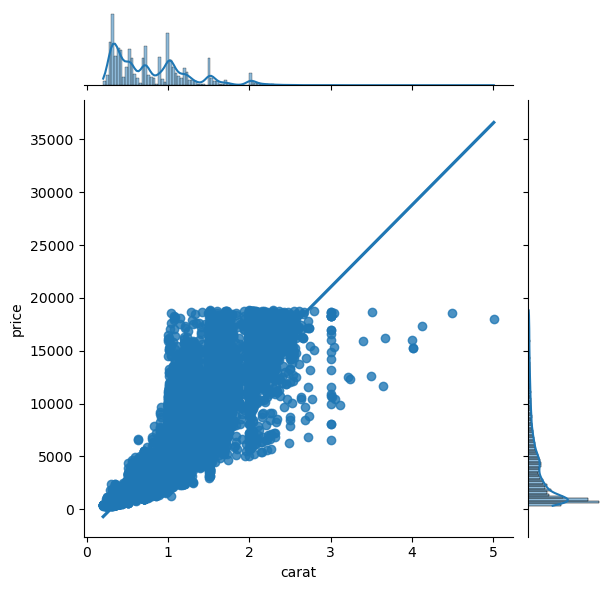

In [17]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='reg')
#creates a jointplot with my variables as the x and y axes, where I can see that there is a relationship between them because I've put in a linear regression plot.